# **Deep Dive into Classifiers**
This Notebook provides a structured breakdown of the classifiers.

For both 3 and 7 classes, we use the same approach, only that the data imported is different. 

This overview includes:
- **Importing dependencies**

- **Exploring the dataset**

- **Data preprocessing steps**

- **Training and evaluating models**
---


## **1. Importing Dependencies**
This section imports all required libraries for data manipulation, machine learning, and evaluation.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from IPython.display import display

---

## **2. Dataset Exploration**

### Loading Dataset

For 7-Class

In [5]:
# Load dataset
df = pd.read_csv("http://13.55.92.56/wp-content/uploads/class_7_dataset.csv")

### Preliminary Information

Class Label Meaning:

0 = waiting/idle

1 = sharpening

2 = slicing

3 = cutting

4 = pulling

5 = reaching

6 = feeling

In [6]:
# Display dataset info
df.info()
print(df.shape)

# Define feature and label columns
X, y = df.iloc[:, :-1], df.iloc[:, -1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11629 entries, 0 to 11628
Columns: 157 entries, acc_mean_x_right to class
dtypes: float64(128), int64(29)
memory usage: 13.9 MB
(11629, 157)


### Class Distribution

It can be observed that certain classes are quite under-represented, showing how this is an imbalanced dataset.

With 3 classes, class 0 and 1 are under-represented, and with 7 classes, class 4 and 6 are under-represented.

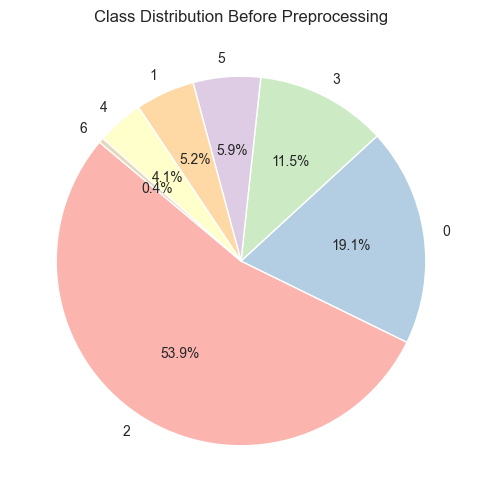

In [7]:
# Function to plot class distribution
def plot_class_distribution(y, title):
    class_counts = y.value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
    plt.title(title)
    plt.show()

# Plot class distribution before and after SMOTE
plot_class_distribution(y, "Class Distribution Before Preprocessing")


### Correlation Heatmap

It can be seen that there are various features that are highly correlated with each other, making them redundant. Moreover, features can be streamlined by removing those which are not highly correlated with the class.

Note: not all feature labels are shown on the axes due to the high number of features present.

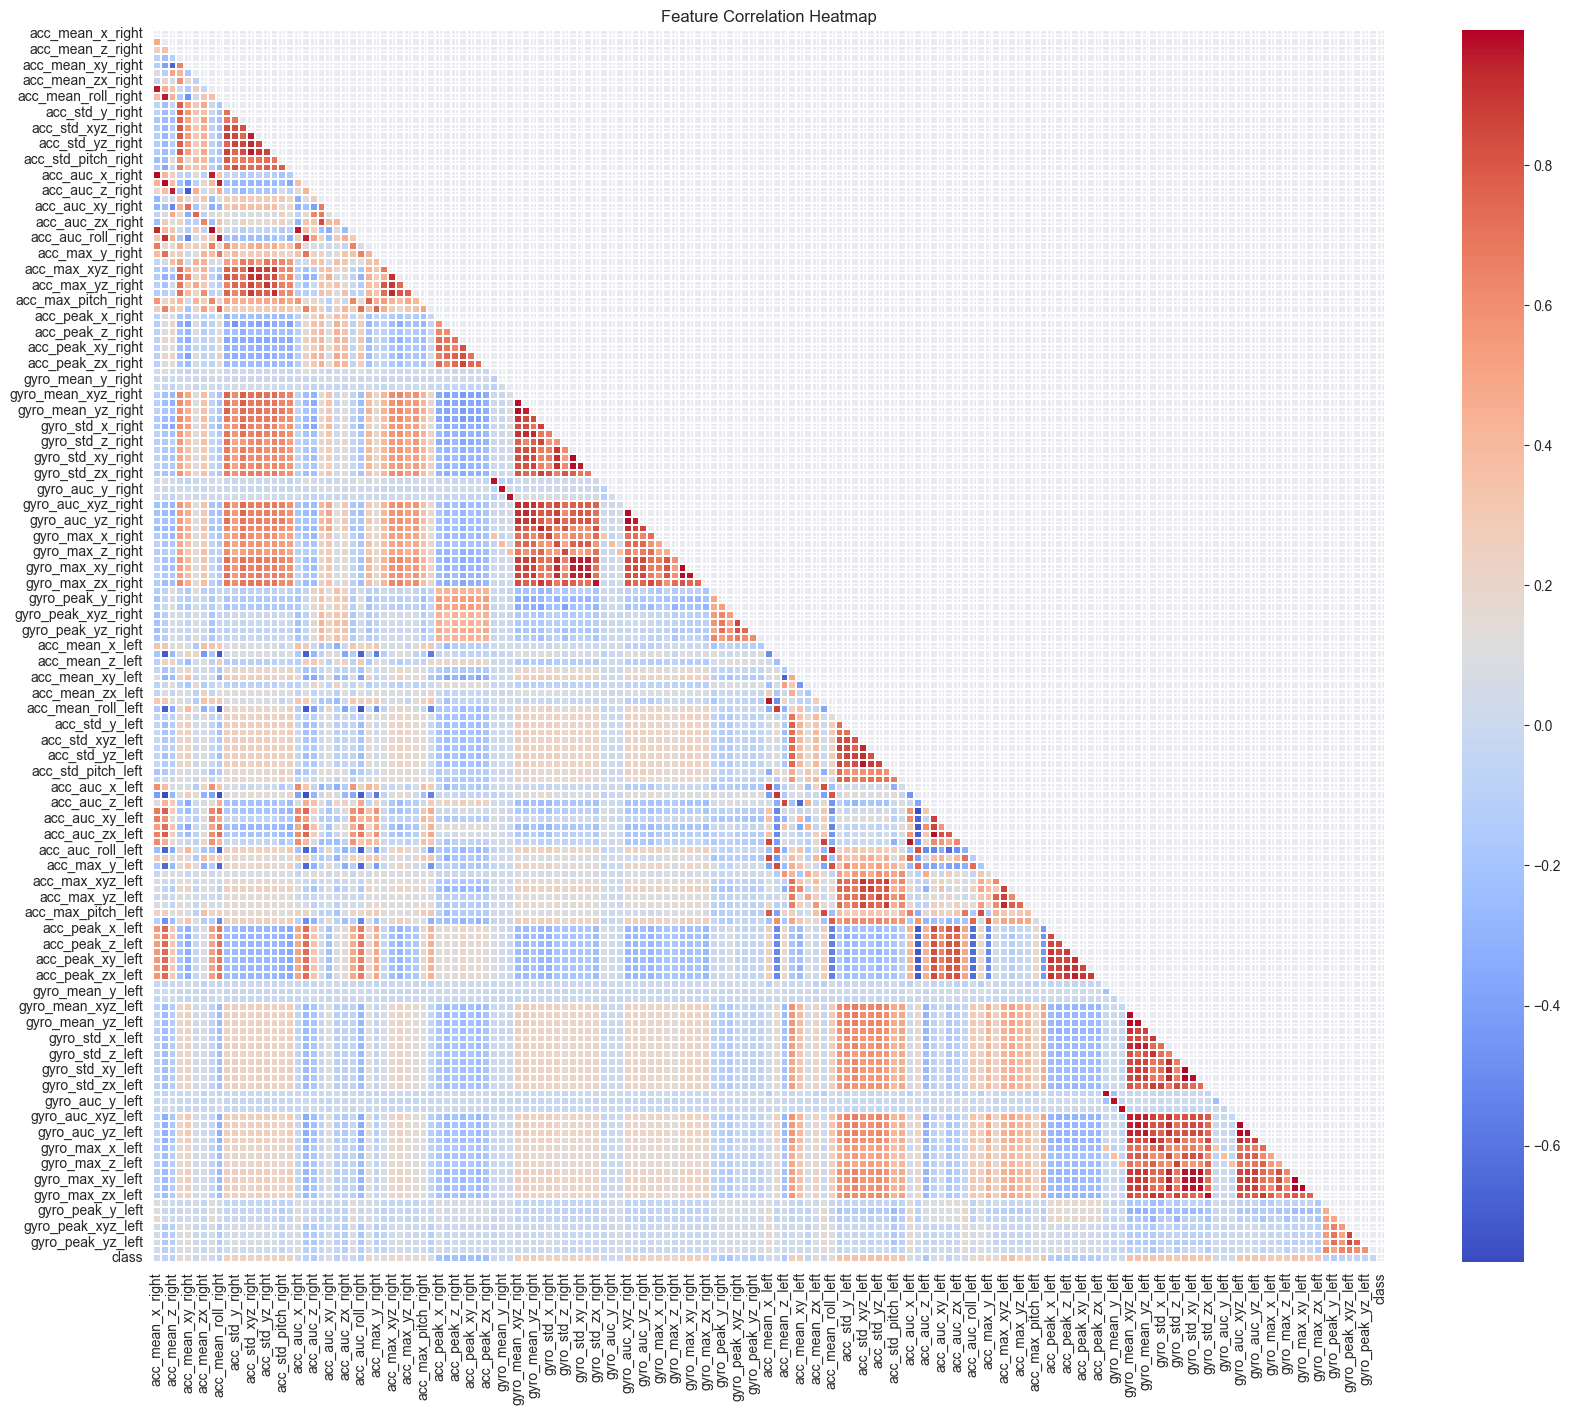

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=False, fmt=".2f",
            linewidths=0.1, cbar=True, square=True)

plt.xticks(rotation=90)
plt.title("Feature Correlation Heatmap")
plt.show()

---

## **3. Data Preprocessing**

### Normalizing

In [9]:
# Normalize features
X_scaled = StandardScaler().fit_transform(X)

### **SMOTE**
SMOTE (Synthetic Minority Over-sampling Technique) helps handle imbalanced datasets. It generates synthetic samples for the minority class rather than duplicating existing ones. This balances class distributions, reducing bias towards the majority class.

By plotting the distribution, we can see the effect of SMOTE on class imbalances

**Limitation:**
Synthetic samples rely on existing data, so if there are few original samples, then the generated samples might be too similar to existing one, which would impede the ability to generalise. This could lead to overfitting as the model could memorise the synthetic samples rather than learning the patterns behind them. 

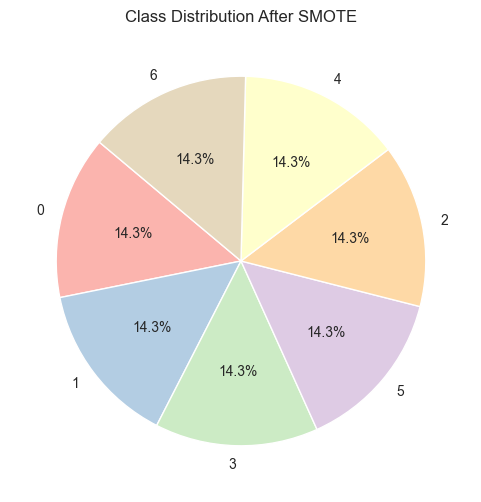

In [10]:
# Apply SMOTE to handle class imbalance
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)

plot_class_distribution(pd.Series(y_resampled), "Class Distribution After SMOTE")

### **PCA**
Principal Component Analysis (PCA) is used to transform a high-dimensional dataset into a lower-dimensional form while preserving as much variance as possible.

#### Improves Efficiency
- High-dimensional datasets can be computationally expensive and difficult to process.
- PCA reduces the number of features while retaining the most critical information.
- This speeds up training times for machine learning models and reduces memory usage.

#### Removes Redundant & Correlated Features
- Many real-world datasets contain features that are highly correlated.
- PCA transforms correlated variables into a set of uncorrelated principal components, eliminating redundancy. This makes models more stable and interpretable.
- Reducing the number of dimensions helps prevent overfitting by removing irrelevant features.

In [11]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_resampled)

# Display removed features
removed_features = np.argsort(np.abs(pca.components_).sum(axis=0))[X_pca.shape[1]:]
print(f"Removed features: {df.columns[removed_features].tolist()}")


Removed features: ['gyro_auc_zx_left', 'acc_std_xy_left', 'acc_peak_y_left', 'acc_auc_x_left', 'acc_std_yz_left', 'gyro_std_xy_right', 'acc_auc_yz_left', 'acc_mean_pitch_right', 'gyro_std_xyz_left', 'acc_std_x_right', 'gyro_std_yz_right', 'gyro_auc_xy_right', 'gyro_auc_yz_right', 'acc_mean_x_right', 'acc_std_z_right', 'acc_auc_y_left', 'acc_auc_pitch_left', 'gyro_max_zx_left', 'acc_std_z_left', 'acc_auc_pitch_right', 'acc_mean_y_right', 'acc_auc_x_right', 'gyro_std_xyz_right', 'gyro_mean_y_right', 'acc_auc_roll_right', 'acc_mean_roll_right', 'acc_max_zx_right', 'gyro_auc_y_right', 'acc_max_x_right', 'acc_max_xyz_left', 'acc_max_x_left', 'acc_max_xy_right', 'acc_mean_pitch_left', 'gyro_mean_z_left', 'acc_auc_y_right', 'gyro_mean_z_right', 'gyro_max_zx_right', 'gyro_std_x_left', 'gyro_auc_z_left', 'acc_max_roll_right', 'gyro_std_z_left', 'gyro_auc_x_left', 'gyro_mean_x_left', 'gyro_std_z_right', 'acc_max_xyz_right', 'acc_auc_roll_left', 'acc_auc_xy_left', 'gyro_auc_z_right', 'gyro_max_z_

---

## **4. Training and Evaluating Models**


### Splitting Dataset and Defining Preliminary Functions

- Train-Test Split: Splits data into 70% training and 30% testing while preserving class distribution.

- Train Model Function: Uses GridSearchCV to find the best hyperparameters with 3-fold cross-validation.  

- Hyperparameter Search Space: Defines tuning parameters for multiple machine learning models.  

- Confusion Matrix Function: Generates and visualizes confusion matrices to assess classification performance. 
 
- Model Metrics List: Stores evaluation results for comparison across different models.

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, stratify=y_resampled,
                                                    random_state=42)


# Function to perform GridSearchCV
def train_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


# Hyperparameter search space
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10], "max_iter": [500, 1000]},
    "Decision Tree": {"max_depth": [5, 10, 20]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [10, 20]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Neural Network": {"hidden_layer_sizes": [(50,), (100,)], "max_iter": [1000, 1500]},
}


# Function to plot confusion matrix
def plot_confusion_matrix(test, pred, name):
    cm = confusion_matrix(test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# List to store model metrics
model_stats = []

### Logistic Regression


Training Logistic Regression...


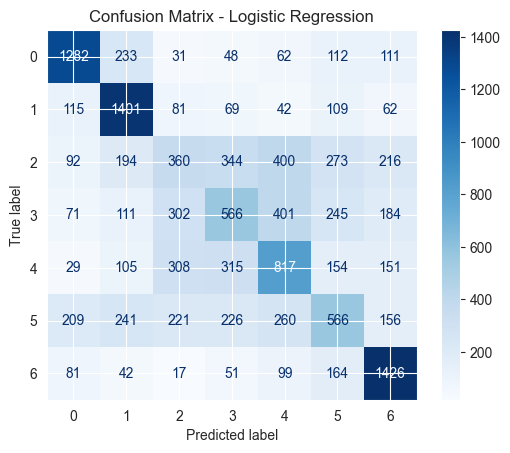

Accuracy: 0.4879, F1 Score: 0.4735


In [13]:
# Train and evaluate Logistic Regression
print("\nTraining Logistic Regression...")
log_reg = train_model(LogisticRegression(solver='lbfgs'), param_grids["Logistic Regression"], X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")
model_stats.append({"Model": "Logistic Regression", "Accuracy": accuracy, "F1 Score": f1})
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

### Decision Tree


Training Decision Tree...


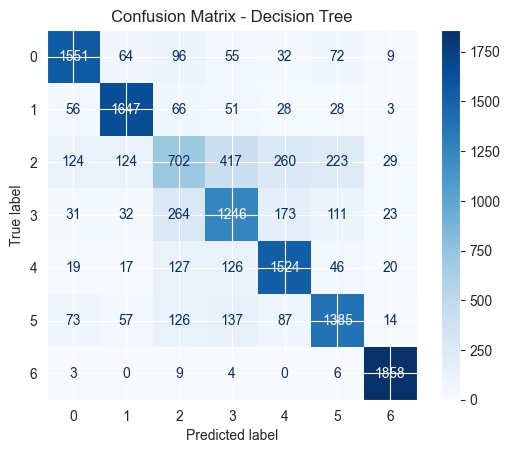

Accuracy: 0.7536, F1 Score: 0.7473


In [14]:
# Train and evaluate Decision Tree
print("\nTraining Decision Tree...")
decision_tree = train_model(DecisionTreeClassifier(), param_grids["Decision Tree"], X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
plot_confusion_matrix(y_test, y_pred, "Decision Tree")
model_stats.append({"Model": "Decision Tree", "Accuracy": accuracy, "F1 Score": f1})
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

### Random Forest


Training Random Forest...


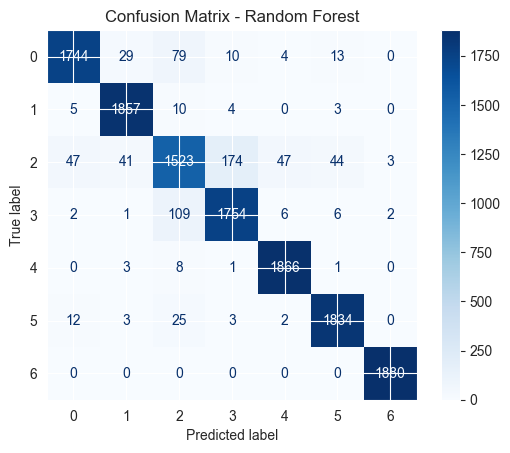

Accuracy: 0.9470, F1 Score: 0.9464


In [15]:
# Train and evaluate Random Forest
print("\nTraining Random Forest...")
random_forest = train_model(RandomForestClassifier(), param_grids["Random Forest"], X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
plot_confusion_matrix(y_test, y_pred, "Random Forest")
model_stats.append({"Model": "Random Forest", "Accuracy": accuracy, "F1 Score": f1})
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

### K-Nearest Neighbors


Training K-Nearest Neighbors...


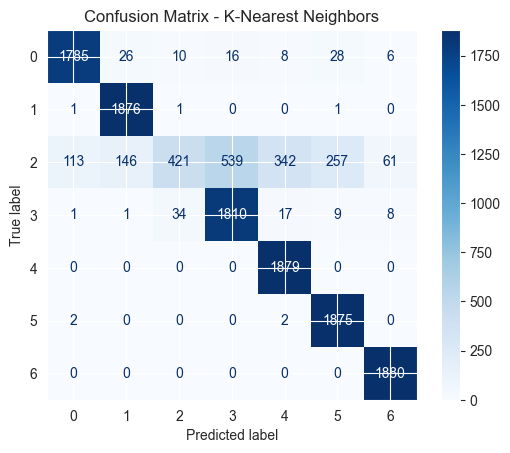

Accuracy: 0.8762, F1 Score: 0.8469


In [16]:
print("\nTraining K-Nearest Neighbors...")
knn = train_model(KNeighborsClassifier(), param_grids["K-Nearest Neighbors"], X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
plot_confusion_matrix(y_test, y_pred, "K-Nearest Neighbors")
model_stats.append({"Model": "K-Nearest Neighbors", "Accuracy": accuracy, "F1 Score": f1})
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

### Support Vector Machine


Training Support Vector Machine...


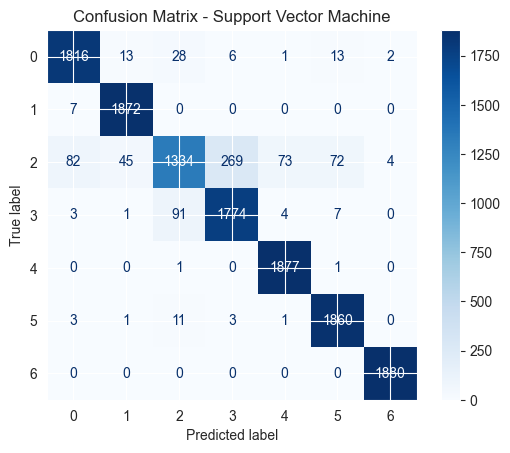

Accuracy: 0.9436, F1 Score: 0.9413


In [17]:
# Train and evaluate Support Vector Machine
print("\nTraining Support Vector Machine...")
svm = train_model(SVC(), param_grids["Support Vector Machine"], X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
plot_confusion_matrix(y_test, y_pred, "Support Vector Machine")
model_stats.append({"Model": "Support Vector Machine", "Accuracy": accuracy, "F1 Score": f1})
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

### Neural Network

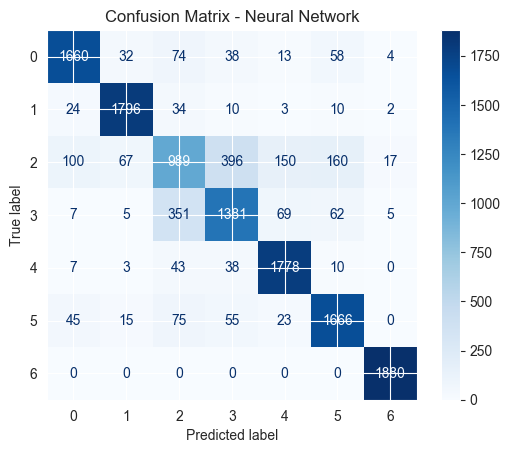

Accuracy: 0.8476, F1 Score: 0.8438


In [18]:
mlp = train_model(MLPClassifier(), param_grids["Neural Network"], X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
plot_confusion_matrix(y_test, y_pred, "Neural Network")
model_stats.append({"Model": "Neural Network", "Accuracy": accuracy, "F1 Score": f1})
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

### Overall Evaluation
Displays the Accuracy and F1 Score for each model.

From here, we find that the SVM, Random Forest, and NN are amongst the best classifiers.

In [19]:
# Create and display model statistics dataframe
model_stats_df = pd.DataFrame(model_stats)
display(model_stats_df)

,Model,Accuracy,F1 Score
0,Logistic Regression,0.487875,0.473469
1,Decision Tree,0.753554,0.747307
2,Random Forest,0.947016,0.946427
3,K-Nearest Neighbors,0.876169,0.846926
4,Support Vector Machine,0.943596,0.941284
5,Neural Network,0.847586,0.843843


---